# Data Analysis Project

> For detailed description of the project and the dataset, please take a look at the README file

- **Author:** Eldar Kasmamytov
- **Student number:** p1712650


## Pre-requisites

### Import dependencies

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from functools import reduce

from attributes import Sex, ChestPain, ECG, Slope, HeartAttack

### Import the dataset

In [2]:
df = pd.read_csv('dataset/heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Description

### Blank values
There is no **`null`** values in the dataset.

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Nevertheless, one of the attributes (`thall`) has a value (`0`) representing **`null`** in the original dataset.

In [4]:
print('Unique values: ', df.thall.unique())
print('Count of value \'0\': ', df.thall.loc[df.thall == 0].count())

Unique values:  [1 2 3 0]
Count of value '0':  2


### Attributes' types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Distribution of the Target attribute

Distribution of the Target attribute:
 1    165
0    138
Name: output, dtype: int64


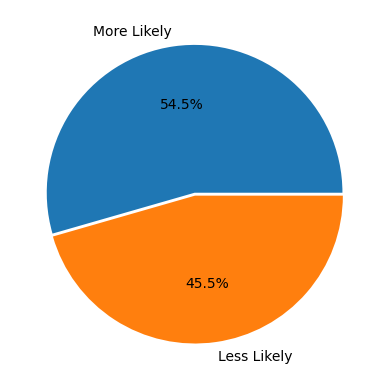

In [6]:
target_value_counts = df.output.value_counts()
print('Distribution of the Target attribute:\n', target_value_counts)

plt.pie(target_value_counts, labels=['More Likely', 'Less Likely'], explode=[0.01, 0.01], autopct="%1.1f%%")
plt.show()

### Distribution of the Target attribute (by Sex)

Sex distribution (Total):
 1    207
0     96
Name: sex, dtype: int64
Sex distribution (MORE chance of heart attack):
 1    93
0    72
Name: sex, dtype: int64
Sex distribution (LESS chance of heart attack):
 1    114
0     24
Name: sex, dtype: int64


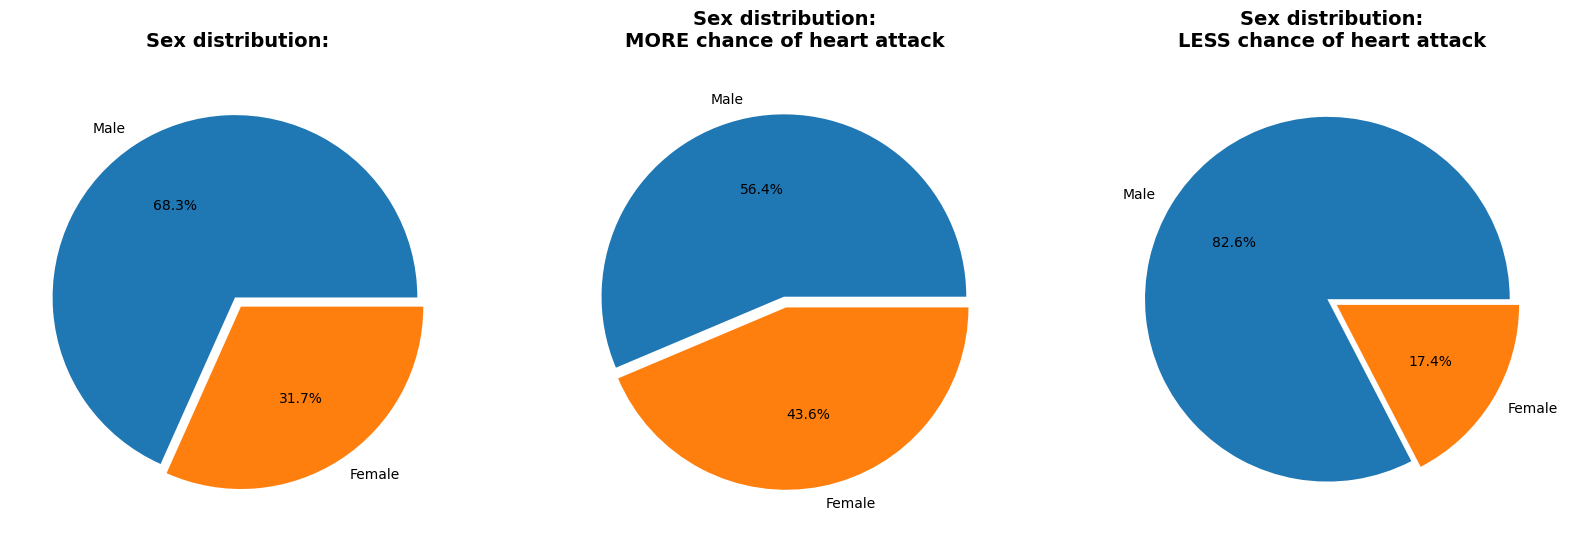

In [7]:
df_likely = df[df['output'] == HeartAttack.Likely.value]
df_notlikely = df[df['output'] == HeartAttack.NotLikely.value]

# Display count
print('Sex distribution (Total):\n', df.sex.value_counts())
print('Sex distribution (MORE chance of heart attack):\n', df_likely.sex.value_counts())
print('Sex distribution (LESS chance of heart attack):\n', df_notlikely.sex.value_counts())

fig, ax = plt.subplots(1, 3, sharey=False, figsize=[20, 20])
labels = ['Male', 'Female']
explode = [0.03, 0.03]

# Pie Charts
ax[0].pie(df.sex.value_counts(), explode=explode, labels=labels, autopct="%1.1f%%")
ax[1].pie(df_likely.sex.value_counts(), explode=explode, labels=labels, autopct="%1.1f%%")
ax[2].pie(df_notlikely.sex.value_counts(), explode=explode, labels=labels, autopct="%1.1f%%")

# Charts' Titles
textOpts = {
    'fontsize': 14,
    'fontweight': 'bold',
    'horizontalalignment': 'center'
}
textPosX = 0; textPosY = 1.4
ax[0].text(textPosX, textPosY, 'Sex distribution:', textOpts)
ax[1].text(textPosX, textPosY, 'Sex distribution:\nMORE chance of heart attack', textOpts)
ax[2].text(textPosX, textPosY, 'Sex distribution:\nLESS chance of heart attack', textOpts)

plt.show()

### Distribution of the Target attribute (by Age)

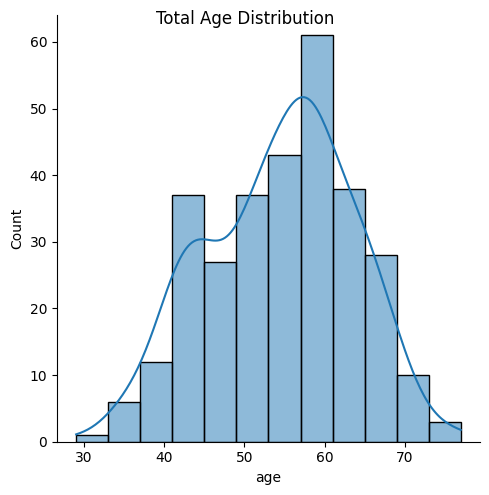

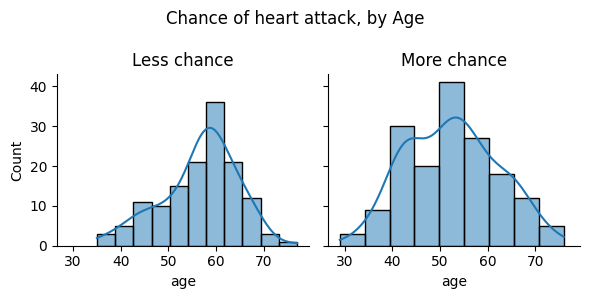

In [8]:
# Total Age distribution
g = sns.displot(df.age, kde=True)
g.figure.suptitle("Total Age Distribution")

g2 = sns.FacetGrid(df, col="output")

# mapping of target attribute's values
axes = g2.axes.flatten()
axes[HeartAttack.NotLikely.value].set_title("Less chance")
axes[HeartAttack.Likely.value].set_title("More chance")

g2.figure.suptitle("Chance of heart attack, by Age") # Set global title

g2.map(sns.histplot, "age", kde=True)

# sns.displot(df_likely.age)
# sns.displot(df_notlikely.age)

#### Statistical tests (Shapiro):

In [9]:
print('Shapiro Test for Total Age Distribution:     ', shapiro(df.age), '\n')

print('Shapiro Test for "not likely":               ', shapiro(df_notlikely.age))
print('Shapiro Test for "likely":                   ', shapiro(df_likely.age))

df_notlikely_subset = df_notlikely.age.loc[(df_notlikely.age > 50) & (df_notlikely.age < 70)]
print('Shapiro Test for "not likely" (50-70 years): ', shapiro(df_notlikely_subset))

Shapiro Test for Total Age Distribution:      ShapiroResult(statistic=0.9863712787628174, pvalue=0.005800595041364431) 

Shapiro Test for "not likely":                ShapiroResult(statistic=0.9686175584793091, pvalue=0.002868662355467677)
Shapiro Test for "likely":                    ShapiroResult(statistic=0.9867705702781677, pvalue=0.12113280594348907)
Shapiro Test for "not likely" (50-70 years):  ShapiroResult(statistic=0.9782580733299255, pvalue=0.08194907754659653)


Après avoir executé les tests statistiques de Shapiro:

- **`Likely (by age):`** \
    Etant donné que **pvalue > 0.05**, on peut dire que ces observations suivent la distribution normale.

- **`Not likely (by age):`** \
    Par contre, ici, **pvalue < 0.05**, donc ce n'est pas une distribution normale.
    
    Cependant, on peut voir sur le graphique qu'une partie des observations suit la loi normale (par exemple, *de 50 à 70 ans*), ce qui est vérifié par le test statistique de Shapiro.

### Distribution of the "`Chest Pain`" attribute

Chest Pain distribution (Total):
 0    143
2     87
1     50
3     23
Name: cp, dtype: int64
Chest Pain distribution (MORE chance of heart attack):
 2    69
1    41
0    39
3    16
Name: cp, dtype: int64
Chest Pain distribution (LESS chance of heart attack):
 0    104
2     18
1      9
3      7
Name: cp, dtype: int64


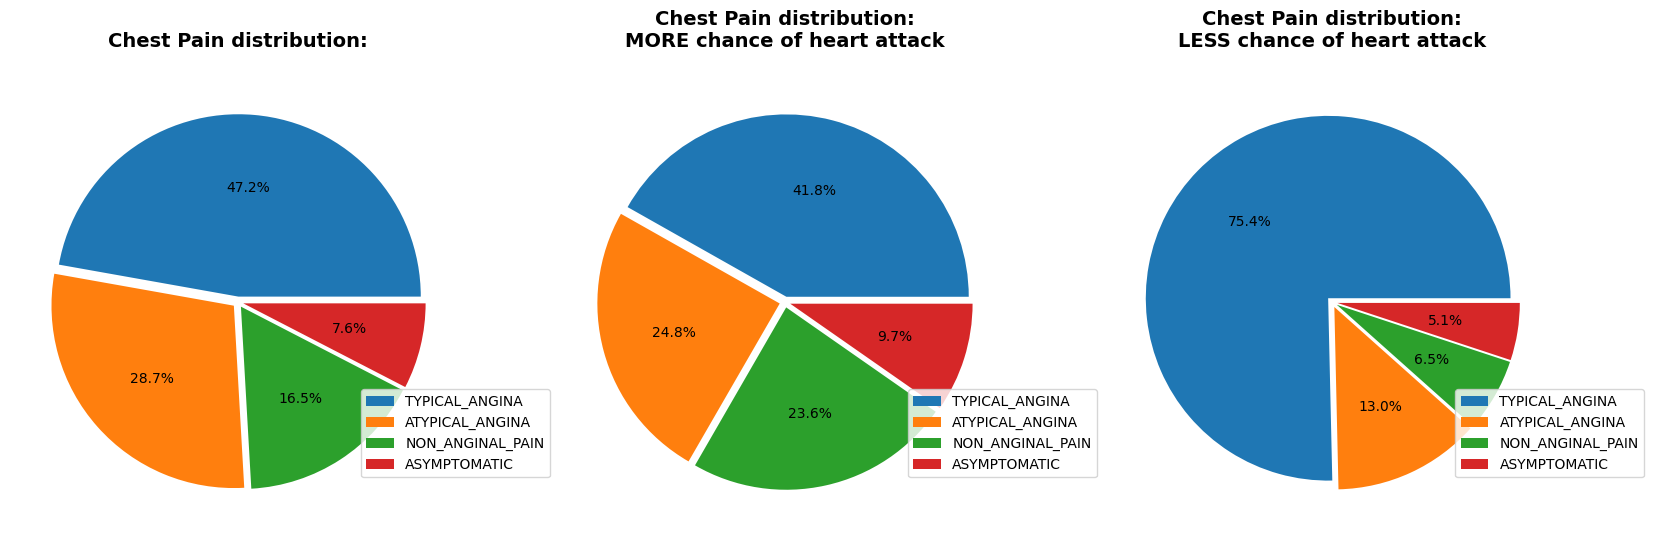

In [10]:
# Display count
print('Chest Pain distribution (Total):\n', df.cp.value_counts())
print('Chest Pain distribution (MORE chance of heart attack):\n', df_likely.cp.value_counts())
print('Chest Pain distribution (LESS chance of heart attack):\n', df_notlikely.cp.value_counts())

fig, ax = plt.subplots(1, 3, sharey=False, figsize=[20, 20])
cp_unique_count = len(df.cp.unique())
explode = [0.03] * cp_unique_count

# Sort items in pandas.Series by index
sorted_items_cp1 = df.cp.value_counts().sort_index()
sorted_items_cp2 = df_likely.cp.value_counts().sort_index()
sorted_items_cp3 = df_notlikely.cp.value_counts().sort_index()

# Get sorted Titles
labels_cp = reduce(lambda list, item: list + [item.name], sorted(ChestPain, key=lambda x: x.value), [])

# Pie Charts
ax[0].pie(df.cp.value_counts(), explode=explode, autopct="%1.1f%%")
ax[0].legend(labels=labels_cp, loc='lower right', bbox_to_anchor=(1.2, 0.1))
ax[1].pie(df_likely.cp.value_counts(), explode=explode, autopct="%1.1f%%")
ax[1].legend(labels=labels_cp, loc='lower right', bbox_to_anchor=(1.2, 0.1))
ax[2].pie(df_notlikely.cp.value_counts(), explode=explode, autopct="%1.1f%%")
ax[2].legend(labels=labels_cp, loc='lower right', bbox_to_anchor=(1.2, 0.1))

# Charts' Titles
textOpts = {
    'fontsize': 14,
    'fontweight': 'bold',
    'horizontalalignment': 'center'
}
textPosX = 0; textPosY = 1.4
ax[0].text(textPosX, textPosY, 'Chest Pain distribution:', textOpts)
ax[1].text(textPosX, textPosY, 'Chest Pain distribution:\nMORE chance of heart attack', textOpts)
ax[2].text(textPosX, textPosY, 'Chest Pain distribution:\nLESS chance of heart attack', textOpts)

plt.show()

### Distribution of the "`Resting ECG`" attribute

ECG distribution (Total):
 1    152
0    147
2      4
Name: restecg, dtype: int64
ECG distribution (MORE chance of heart attack)
 1    96
0    68
2     1
Name: restecg, dtype: int64
ECG distribution (LESS chance of heart attack)
 0    79
1    56
2     3
Name: restecg, dtype: int64


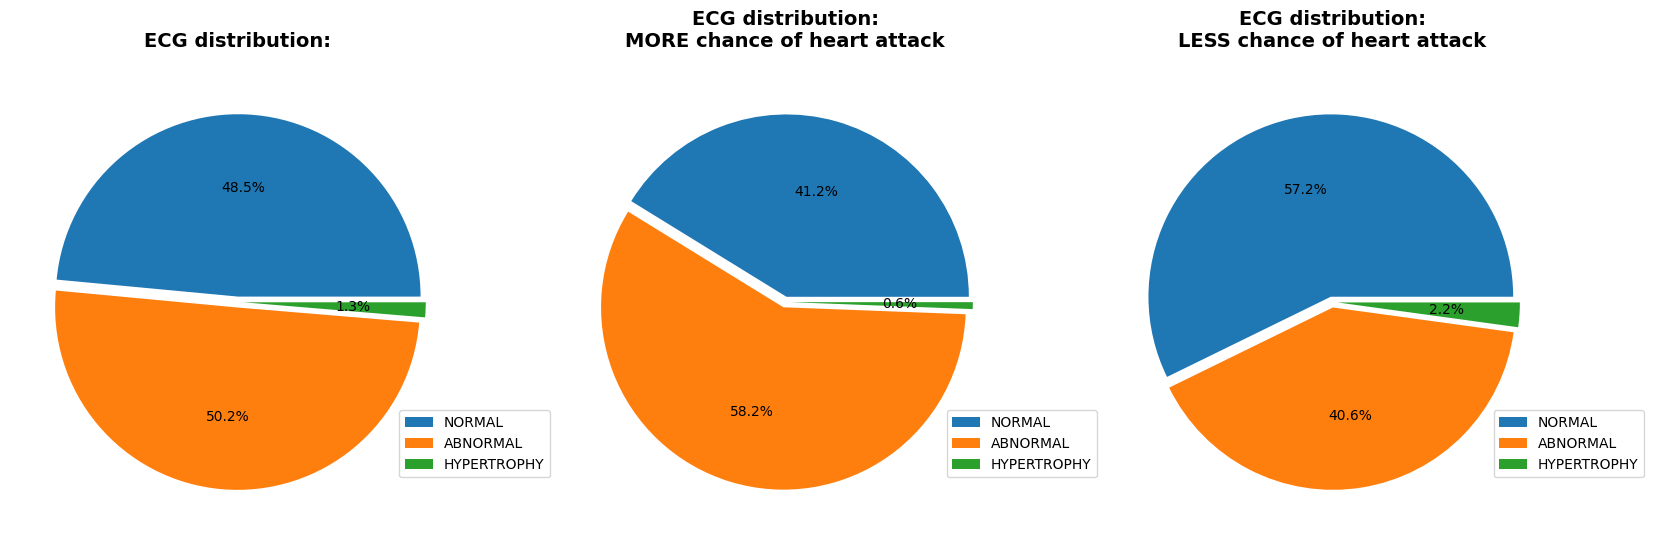

In [11]:
# Display count
print('ECG distribution (Total):\n', df.restecg.value_counts())
print('ECG distribution (MORE chance of heart attack)\n', df_likely.restecg.value_counts())
print('ECG distribution (LESS chance of heart attack)\n', df_notlikely.restecg.value_counts())

fig, ax = plt.subplots(1, 3, sharey=False, figsize=[20, 20])
ecg_unique_count = len(df.restecg.unique())
explode = [0.03] * ecg_unique_count

# Sort items in pandas.Series by index
sorted_items_ecg1 = df.restecg.value_counts().sort_index()
sorted_items_ecg2 = df_likely.restecg.value_counts().sort_index()
sorted_items_ecg3 = df_notlikely.restecg.value_counts().sort_index()

# Get sorted Titles
labels_ecg = reduce(lambda list, item: list + [item.name], sorted(ECG, key=lambda x: x.value), [])

# Pie Charts
ax[0].pie(sorted_items_ecg1, explode=explode, autopct="%1.1f%%")
ax[0].legend(labels=labels_ecg, loc='lower right', bbox_to_anchor=(1.2, 0.1))
ax[1].pie(sorted_items_ecg2, explode=explode, autopct="%1.1f%%")
ax[1].legend(labels=labels_ecg, loc='lower right', bbox_to_anchor=(1.2, 0.1))
ax[2].pie(sorted_items_ecg3, explode=explode, autopct="%1.1f%%")
ax[2].legend(labels=labels_ecg, loc='lower right', bbox_to_anchor=(1.2, 0.1))

# Charts' Titles
textOpts = {
    'fontsize': 14,
    'fontweight': 'bold',
    'horizontalalignment': 'center'
}
textPosX = 0; textPosY = 1.4
ax[0].text(textPosX, textPosY, 'ECG distribution:', textOpts)
ax[1].text(textPosX, textPosY, 'ECG distribution:\nMORE chance of heart attack', textOpts)
ax[2].text(textPosX, textPosY, 'ECG distribution:\nLESS chance of heart attack', textOpts)

plt.show()